In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Read the CSV file
df = pd.read_csv('fist_0.csv')

# Extract the sensor columns
sensor_columns = df.columns
for i in range(0, len(sensor_columns)):
    df.rename(columns = {sensor_columns[i]:i}, inplace = True)

# Apply RMS to the data
#df_rms = df.apply(lambda x: np.sqrt(np.mean(x**2)), axis=0)
print(df.columns)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7], dtype='int64')


In [3]:
def rmsValue(array):
    n = len(array)
    squre = 0.0
    root = 0.0
    mean = 0.0
    
    #calculating Squre
    for i in range(0, n):
        squre += (array[i] ** 2)
    #Calculating Mean
    mean = (squre/ (float)(n))
    #Calculating Root
    root = math.sqrt(mean)
    return root

In [5]:
rms_row_count = (int(len(df) / 20) - 1)

280


In [24]:
rms_initial_values =  np.arange(start=0,stop= 280*8).reshape(280,8)
rms_initial_values[rms_initial_values > 0] = 0

In [25]:
indexes = np.arange(start=0,stop= rms_row_count)

In [26]:
df_result = pd.DataFrame(rms_initial_values, indexes, [1,2,3,4,5,6,7,8])
print(df_result)

     1  2  3  4  5  6  7  8
0    0  0  0  0  0  0  0  0
1    0  0  0  0  0  0  0  0
2    0  0  0  0  0  0  0  0
3    0  0  0  0  0  0  0  0
4    0  0  0  0  0  0  0  0
..  .. .. .. .. .. .. .. ..
275  0  0  0  0  0  0  0  0
276  0  0  0  0  0  0  0  0
277  0  0  0  0  0  0  0  0
278  0  0  0  0  0  0  0  0
279  0  0  0  0  0  0  0  0

[280 rows x 8 columns]


In [33]:
for i in range(8):
    df_sensor = df[i]
    temp_row = []
    for j in range(int(len(df) / 20) - 1):
        temp_df = df_sensor[(j*20): (j+1)*20]
        temp_df=temp_df.reset_index(drop=True)
        temp_df = pd.DataFrame([rmsValue(temp_df)])
        df_result[i+1].iloc[j] = rmsValue(temp_df)
    

C:\Users\Dide\AppData\Local\Temp\ipykernel_18560\1067996421.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result[i+1].iloc[j] = rmsValue(temp_df)


In [34]:
#print(df_result)

            1          2         3         4          5         6         7  \
0    3.301515   8.330666  2.469818  3.591657  10.594810  4.690416  2.738613   
1    3.911521  14.496551  2.941088  4.663690  16.623778  4.201190  4.177320   
2    2.941088   7.256032  2.863564  2.966479  11.428036  4.883646  3.974921   
3    2.323790   4.177320  2.683282  2.966479   5.839521  4.924429  3.449638   
4    2.224860   4.647580  2.598076  3.301515   4.472136  3.232646  2.607681   
..        ...        ...       ...       ...        ...       ...       ...   
275  2.224860   4.092676  2.334524  2.729469   4.043513  5.239275  2.872281   
276  2.190890   4.283690  2.655184  3.449638   5.152669  3.074085  2.236068   
277  2.258318   4.555217  2.355844  2.449490   2.889637  3.761649  2.366432   
278  1.732051   3.041381  1.897367  3.263434   4.410215  4.560702  3.361547   
279  1.746425   2.313007  2.397916  2.692582   4.000000  3.660601  3.074085   

            8  
0    3.016621  
1    3.301515  
2  

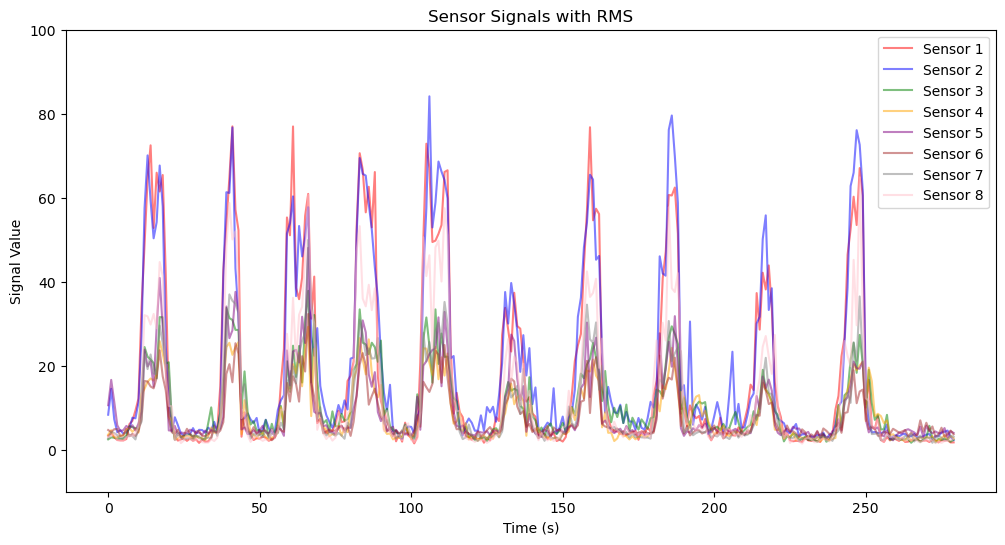

In [46]:

time_values = np.arange(280)  

# Define legend names and colors
legend_names = ['Sensor 1', 'Sensor 2', 'Sensor 3', 'Sensor 4', 'Sensor 5', 'Sensor 6', 'Sensor 7', 'Sensor 8']
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'gray', 'pink']

# Set the plot size
plt.figure(figsize=(12, 6))  # Adjust figsize as needed

# Plot each sensor with custom legend names and colors
for i in range (8):
     plt.plot(time_values, df_result[i+1], label=legend_names[i], color=colors[i], alpha=0.5)


# Plot RMS values for each sensor
#plt.plot(time_values, df_rms.repeat(len(time_values)), color='black', label='RMS')
#plt.plot(time_values[:len(df_result)], df_result, color='blue', label='RMS')

# Set plot labels and title
plt.xlabel('Time (s)')
plt.ylabel('Signal Value')
plt.title('Sensor Signals with RMS')

# Set y-axis limits based on the minimum and maximum values of the dataset
y_min = df.min().min()  # Minimum value across all columns
y_max = df.max().max()  # Maximum value across all columns
plt.ylim(-10, 100)
#plt.xlim(5,25)

# Add legend
plt.legend()

# Display the plot
plt.show()
